## **Data Cleaning and EDA for House Rentals in Malaysia**

### Data Cleaning

In [ ]:
import pandas as pd

#Load dataset
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Documents\\VSC codes\\WIH3001 Project\\House_Rental.csv')

#Data Cleaning

#Show basic info
print("Initial shape:", df.shape)
print(df.info())

Initial shape: (13901, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13901 entries, 0 to 13900
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 13901 non-null  object
 1   Price                13901 non-null  object
 2   Size                 13901 non-null  object
 3   Number of beds       13901 non-null  object
 4   Number of bathrooms  13901 non-null  object
 5   Type                 13901 non-null  object
 6   Furnished Status     13901 non-null  object
 7   Location             9636 non-null   object
 8   District             9636 non-null   object
 9   State                9636 non-null   object
 10  Facilities           11651 non-null  object
 11  Public transport     13901 non-null  bool  
dtypes: bool(1), object(11)
memory usage: 1.2+ MB
None


In [2]:
df.head()

,Name,Price,Size,Number of beds,Number of bathrooms,Type,Furnished Status,Location,District,State,Facilities,Public transport
0,"Putra Heights, Selangor","2,200","1,400",4,3,2-storey Terraced House,Fully Furnished,NaN,NaN,NaN,"Parking, Playground, Jogging Track",False
1,"I-Santorini, Tanjong Tokong, Penang","1,500",850,3,2,Condominium,Partially Furnished,"Jalan Seri Tanjung Pinang 1, Seri Tanjung Pina...",Tanjong Tokong,Penang,"Parking, Security, Lift, Swimming Pool, Playgr...",False
2,"Puncak Alam, Selangor","1,800","1,200",4,3,2-storey Terraced House,Not Furnished,NaN,NaN,NaN,"Parking, Playground, Minimart",False
3,"Simfoni 1, Semenyih, Selangor","1,500","1,073",3,2,Condominium,Fully Furnished,"Jalan 3/20, Bandar Teknologi Kajang, 43500 Sem...",Semenyih,Selangor,"Parking, Security, Lift, Swimming Pool, Playgr...",False
4,"Legend Height, Segambut, Kuala Lumpur","2,300","1,050",3,2,Service Residence,Partially Furnished,"Jalan Udang Siar 2, Taman Sri Segambut, 52000 ...",Segambut,Kuala Lumpur,"Parking, Security, Lift, Swimming Pool, Playgr...",False


In [3]:
#Check for missing values
print(df.isnull().sum())

Name                      0
Price                     0
Size                      0
Number of beds            0
Number of bathrooms       0
Type                      0
Furnished Status          0
Location               4265
District               4265
State                  4265
Facilities             2250
Public transport          0
dtype: int64


In [4]:
#Showing rows with missing values in District, State, and Location columns
missing_loc_data = df[df['District'].isnull() | df['State'].isnull() | df['Location'].isnull()].head(10)
print(missing_loc_data)

                            Name  Price   Size Number of beds  \
0        Putra Heights, Selangor  2,200  1,400              4   
2          Puncak Alam, Selangor  1,800  1,200              4   
6              Kundang, Selangor  4,000  3,150              4   
9           Nibong Tebal, Penang  1,100  1,300              4   
15       Kota Kemuning, Selangor  2,800  1,900              3   
21                  Kulim, Kedah    800  1,600              3   
25           Cyberjaya, Selangor  1,400    850              3   
38  D'summit, Johor Bahru, Johor  1,300  1,000              1   
42       Kubang Kerian, Kelantan    900  1,500              3   
43                  Kulai, Johor  1,700  1,540              3   

   Number of bathrooms                     Type     Furnished Status Location  \
0                    3  2-storey Terraced House      Fully Furnished      NaN   
2                    3  2-storey Terraced House        Not Furnished      NaN   
6                    3  2-storey Terraced

                           Location  District  State
Type                                                
1-storey Terraced House         576       576    576
1.5-storey Terraced House        36        36     36
2-storey Terraced House        1880      1880   1880
2.5-storey Terraced House        70        70     70
3-storey Terraced House          95        95     95
3.5-storey Terraced House         7         7      7
Apartment                       124       124    124
Bungalow House                  181       181    181
Cluster House                    59        59     59
Condominium                      84        84     84
Duplex                            0         0      0
Flat                             30        30     30
Link Bungalow                     8         8      8
Others                          159       159    159
Semi-Detached House             440       440    440
Service Residence                48        48     48
Studio                           13        13 

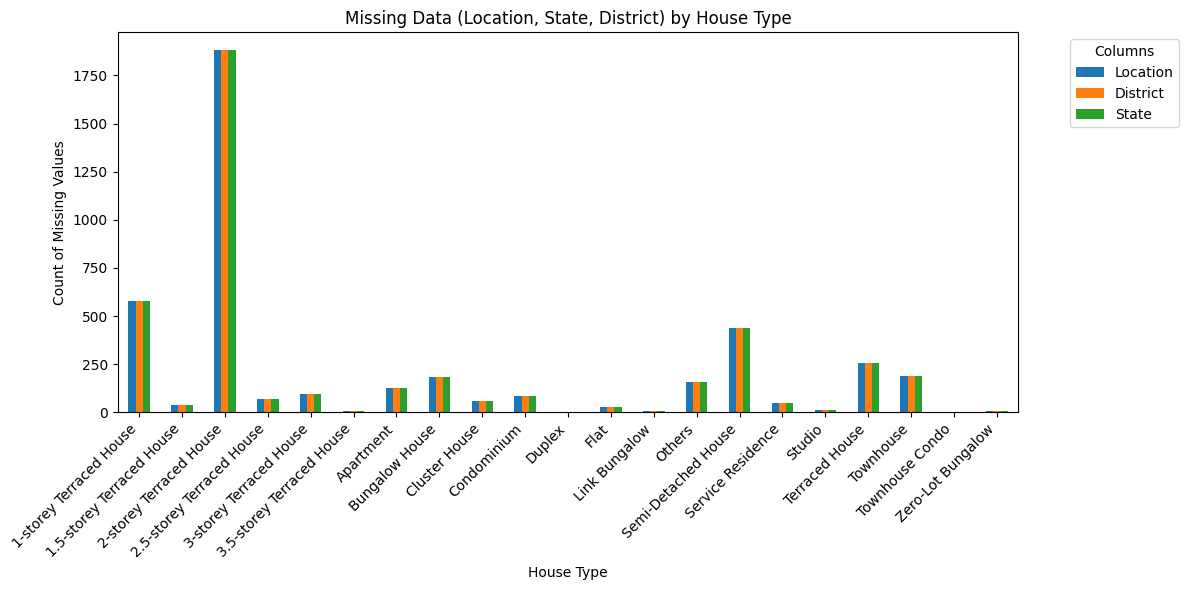

In [5]:
import matplotlib.pyplot as plt

#Analyze missing data (Location, State, District) by house type
missing_by_type = df.groupby('Type')[['Location', 'District', 'State']].apply(lambda x: x.isnull().sum())
print(missing_by_type)

#Create a bar chart for missing data by house type
missing_by_type.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Data (Location, State, District) by House Type')
plt.xlabel('House Type')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
#Preprocessing the location missing values
malaysia_states = [
    'Johor','Kedah','Kelantan','Malacca','Melaka','Negeri Sembilan','Pahang','Penang','Pulau Pinang',
    'Perak','Perlis','Sabah','Sarawak','Selangor','Terengganu','Kuala Lumpur','Putrajaya','Labuan'
]

def extract_geo_info(name):
    if pd.isna(name):
        return pd.Series([None, None, None])
    
    parts = [p.strip() for p in name.split(',')]
    
    #If the name is malformed
    if len(parts) < 2:
        return pd.Series([name, None, None])
    
    #If there are at least 3 parts, assume format "A, B, C" where B is district and C is state
    if len(parts) >= 3:
        district, state = parts[-2], parts[-1]
    else:
        district, state = parts[0], parts[-1]

    if state not in malaysia_states:
        #Might be reversed or malformed
        return pd.Series([name, district, None])
    
    return pd.Series([name, district, state])


df[['Location_filled', 'District_filled', 'State_filled']] = df['Name'].apply(extract_geo_info)

In [7]:
#Fill in the missing values
df['District'] = df['District'].fillna(df['District_filled'])
df['State'] = df['State'].fillna(df['State_filled'])
df['Location'] = df['Location'].fillna(df['Location_filled'])

In [8]:
#Check again for missing values
print(df.isnull().sum())

Name                      0
Price                     0
Size                      0
Number of beds            0
Number of bathrooms       0
Type                      0
Furnished Status          0
Location                  0
District                  5
State                     5
Facilities             2250
Public transport          0
Location_filled           0
District_filled          10
State_filled             10
dtype: int64


In [9]:
#Check for remaining missing values
missing_loc_data = df[df['District'].isnull() | df['State'].isnull() | df['Location'].isnull()].head(10)
print(missing_loc_data)

       Name  Price   Size Number of beds Number of bathrooms  \
2919   100%  2,300  2,200              4                   3   
6954   100%  3,000  2,300              4                   3   
11462  100%  2,100  1,900              5                   5   
12838  100%  1,800  3,200              5                   3   
13806  100%  8,000  3,230              5                   5   

                          Type     Furnished Status Location District State  \
2919                 Townhouse      Fully Furnished     100%     None  None   
6954            Terraced House      Fully Furnished     100%     None  None   
11462  2-storey Terraced House  Partially Furnished     100%     None  None   
12838      Semi-Detached House        Not Furnished     100%     None  None   
13806      Semi-Detached House      Fully Furnished     100%     None  None   

                                              Facilities  Public transport  \
2919                       Parking, Security, Playground      

In [10]:
#Drop the rows shown above
df = df.dropna(subset=['District', 'State', 'Location'])

In [11]:
#Check again for missing values
print(df.isnull().sum())

Name                      0
Price                     0
Size                      0
Number of beds            0
Number of bathrooms       0
Type                      0
Furnished Status          0
Location                  0
District                  0
State                     0
Facilities             2249
Public transport          0
Location_filled           0
District_filled           5
State_filled              5
dtype: int64


In [12]:
missing_loc_data = df[df['District_filled'].isnull() | df['State_filled'].isnull()].head(10)
print(missing_loc_data)

       Name  Price   Size Number of beds Number of bathrooms  \
731    100%  1,650    618              1                   1   
3802   100%  1,300    650              1                   1   
4430   100%  2,700  1,034              3                   2   
7861   100%  1,300    700              3                   2   
10121  100%  2,900    780              1                   2   

                    Type     Furnished Status  \
731    Service Residence  Partially Furnished   
3802         Condominium      Fully Furnished   
4430         Condominium      Fully Furnished   
7861         Condominium      Fully Furnished   
10121        Condominium      Fully Furnished   

                                                Location       District  \
731    Jalan Cheras Hartamas, Taman Bukit Segar, 4320...         Cheras   
3802   Jalan Harbour View, Bagan Dalam, 12100 Butterw...    Butterworth   
4430   Lorong Bunga Matahari 1, Taman Fantasi, 88400 ...  Kota Kinabalu   
7861   Jalan Batu Ub

In [13]:
#Update the 'Name' column in missing_loc_data to use the corresponding 'Location' value
missing_loc_data['Name'] = missing_loc_data['Location']
print(missing_loc_data)

                                                    Name  Price   Size  \
731    Jalan Cheras Hartamas, Taman Bukit Segar, 4320...  1,650    618   
3802   Jalan Harbour View, Bagan Dalam, 12100 Butterw...  1,300    650   
4430   Lorong Bunga Matahari 1, Taman Fantasi, 88400 ...  2,700  1,034   
7861   Jalan Batu Uban, Kampung Batu Uban, 11700 Gelu...  1,300    700   
10121  Jalan Tun Fuad Stephen, 88000 Kota Kinabalu, S...  2,900    780   

      Number of beds Number of bathrooms               Type  \
731                1                   1  Service Residence   
3802               1                   1        Condominium   
4430               3                   2        Condominium   
7861               3                   2        Condominium   
10121              1                   2        Condominium   

          Furnished Status                                           Location  \
731    Partially Furnished  Jalan Cheras Hartamas, Taman Bukit Segar, 4320...   
3802       Ful

In [14]:
#Showing rows with missing values in facilities columns
missing_fac_data = df[df['Facilities'].isnull()].head(10)
print(missing_fac_data)

                             Name  Price   Size Number of beds  \
9            Nibong Tebal, Penang  1,100  1,300              4   
25            Cyberjaya, Selangor  1,400    850              3   
38   D'summit, Johor Bahru, Johor  1,300  1,000              1   
43                   Kulai, Johor  1,700  1,540              3   
54            Pasir Gudang, Johor  1,800  2,070              4   
62  Bandar Puteri Klang, Selangor  6,000  5,077              6   
65          Simpang Ampat, Penang  1,600  1,650              4   
83             Johor Bahru, Johor  4,000  2,683              5   
84                  Skudai, Johor  1,500  1,540              3   
93         Durian Tunggal, Melaka  1,500  2,880              5   

   Number of bathrooms                     Type     Furnished Status  \
9                    3  2-storey Terraced House  Partially Furnished   
25                   2                   Others  Partially Furnished   
38                   1                   Others      Full

In [15]:
#Fill missing Facilities values with 'None'
df['Facilities'] = df['Facilities'].fillna('None')

In [16]:
#Check for missing values
print(df.isnull().sum())

Name                   0
Price                  0
Size                   0
Number of beds         0
Number of bathrooms    0
Type                   0
Furnished Status       0
Location               0
District               0
State                  0
Facilities             0
Public transport       0
Location_filled        0
District_filled        5
State_filled           5
dtype: int64


In [17]:
# Drop the helper
df = df.drop(columns=['Location_filled', 'District_filled', 'State_filled'])
df.head()

,Name,Price,Size,Number of beds,Number of bathrooms,Type,Furnished Status,Location,District,State,Facilities,Public transport
0,"Putra Heights, Selangor","2,200","1,400",4,3,2-storey Terraced House,Fully Furnished,"Putra Heights, Selangor",Putra Heights,Selangor,"Parking, Playground, Jogging Track",False
1,"I-Santorini, Tanjong Tokong, Penang","1,500",850,3,2,Condominium,Partially Furnished,"Jalan Seri Tanjung Pinang 1, Seri Tanjung Pina...",Tanjong Tokong,Penang,"Parking, Security, Lift, Swimming Pool, Playgr...",False
2,"Puncak Alam, Selangor","1,800","1,200",4,3,2-storey Terraced House,Not Furnished,"Puncak Alam, Selangor",Puncak Alam,Selangor,"Parking, Playground, Minimart",False
3,"Simfoni 1, Semenyih, Selangor","1,500","1,073",3,2,Condominium,Fully Furnished,"Jalan 3/20, Bandar Teknologi Kajang, 43500 Sem...",Semenyih,Selangor,"Parking, Security, Lift, Swimming Pool, Playgr...",False
4,"Legend Height, Segambut, Kuala Lumpur","2,300","1,050",3,2,Service Residence,Partially Furnished,"Jalan Udang Siar 2, Taman Sri Segambut, 52000 ...",Segambut,Kuala Lumpur,"Parking, Security, Lift, Swimming Pool, Playgr...",False


In [20]:
df.to_csv('house_data_cleaned.csv')

### EDA

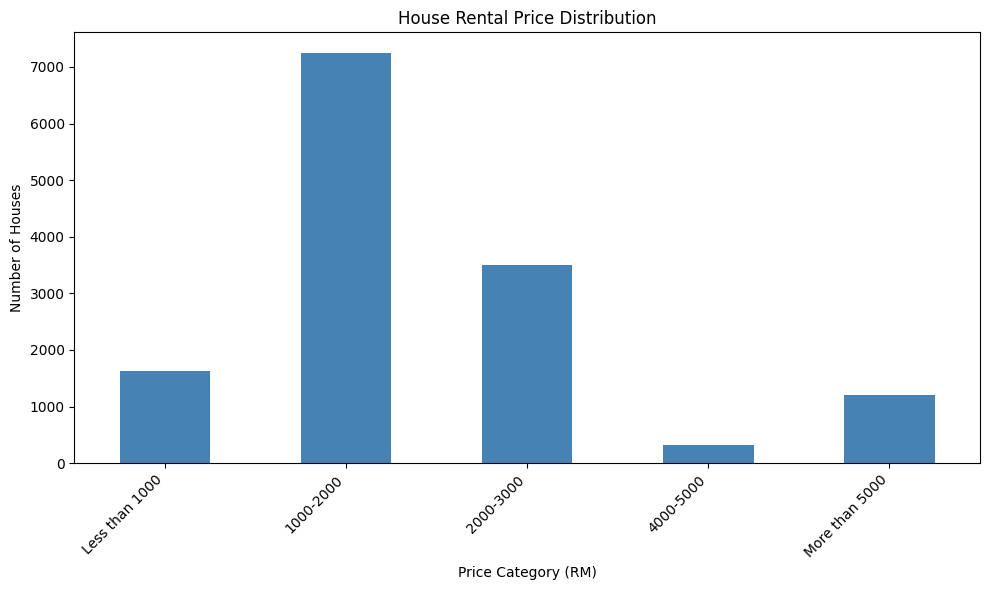

In [18]:
#Convert Price to numeric by removing commas
df['Price_numeric'] = df['Price'].str.replace(',', '').astype(int)

#Create price categories
def categorize_price(price):
    if price < 1000:
        return 'Less than 1000'
    elif 1000 <= price < 2000:
        return '1000-2000'
    elif 2000 <= price < 3000:
        return '2000-3000'
    elif 4000 <= price < 5000:
        return '4000-5000'
    else:
        return 'More than 5000'

df['Price_Category'] = df['Price_numeric'].apply(categorize_price)

#Count occurrences of each category
price_counts = df['Price_Category'].value_counts().reindex([
    'Less than 1000', '1000-2000', '2000-3000', '4000-5000', 'More than 5000'
])

#Create bar chart
price_counts.plot(kind='bar', figsize=(10, 6), color='steelblue')
plt.title('House Rental Price Distribution')
plt.xlabel('Price Category (RM)')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

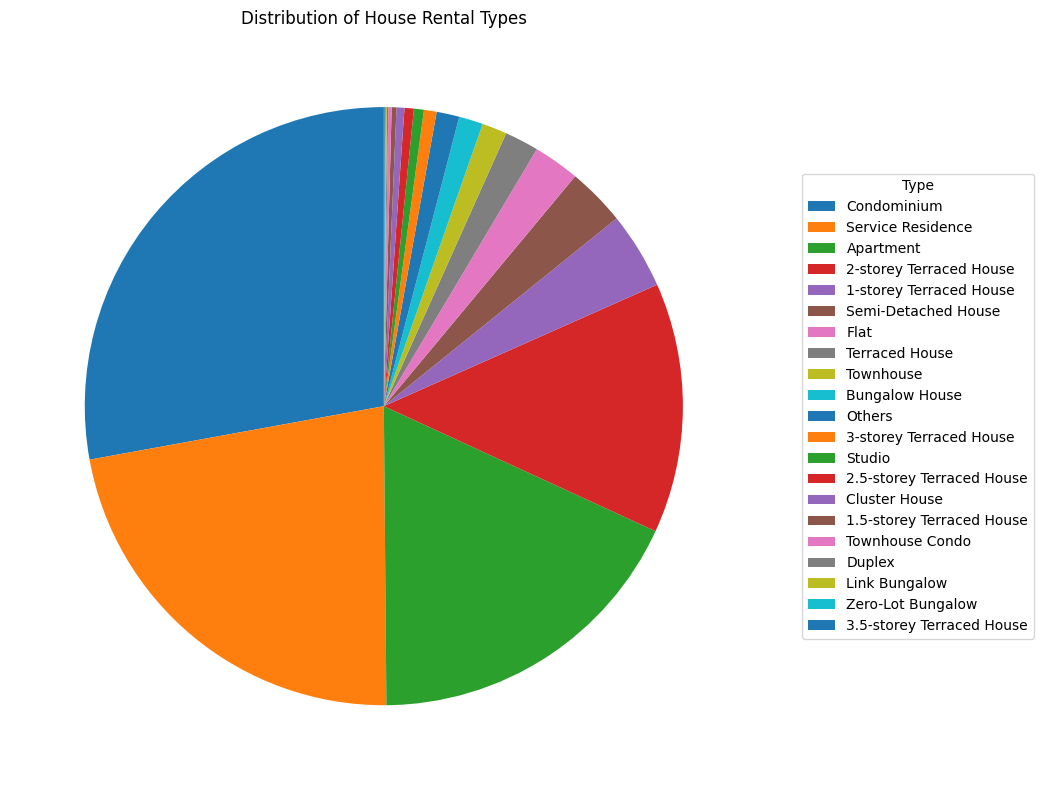

In [19]:
#Create a pie chart for house rental types
type_counts = df['Type'].value_counts()

plt.figure(figsize=(12, 8))
#Draw pie without labels on wedges to avoid overlap, show percentages instead
type_counts.plot(kind='pie', startangle=90, labels=None)
plt.title('Distribution of House Rental Types')
plt.ylabel('')
#Place legend outside the plot to avoid overlapping labels
plt.legend(type_counts.index, title='Type', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()

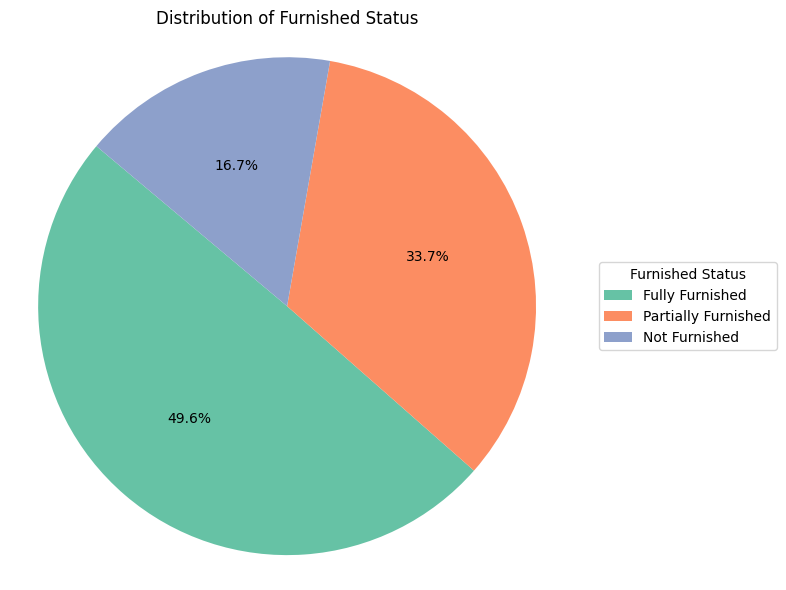

In [20]:
#Pie chart for Furnished Status
furn_counts = df['Furnished Status'].value_counts()

plt.figure(figsize=(8, 6))
furn_counts.plot(
    kind='pie',
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62', '#8da0cb'][:len(furn_counts)]
)
plt.title('Distribution of Furnished Status')
plt.ylabel('')
plt.axis('equal')
plt.legend(furn_counts.index, title='Furnished Status', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()

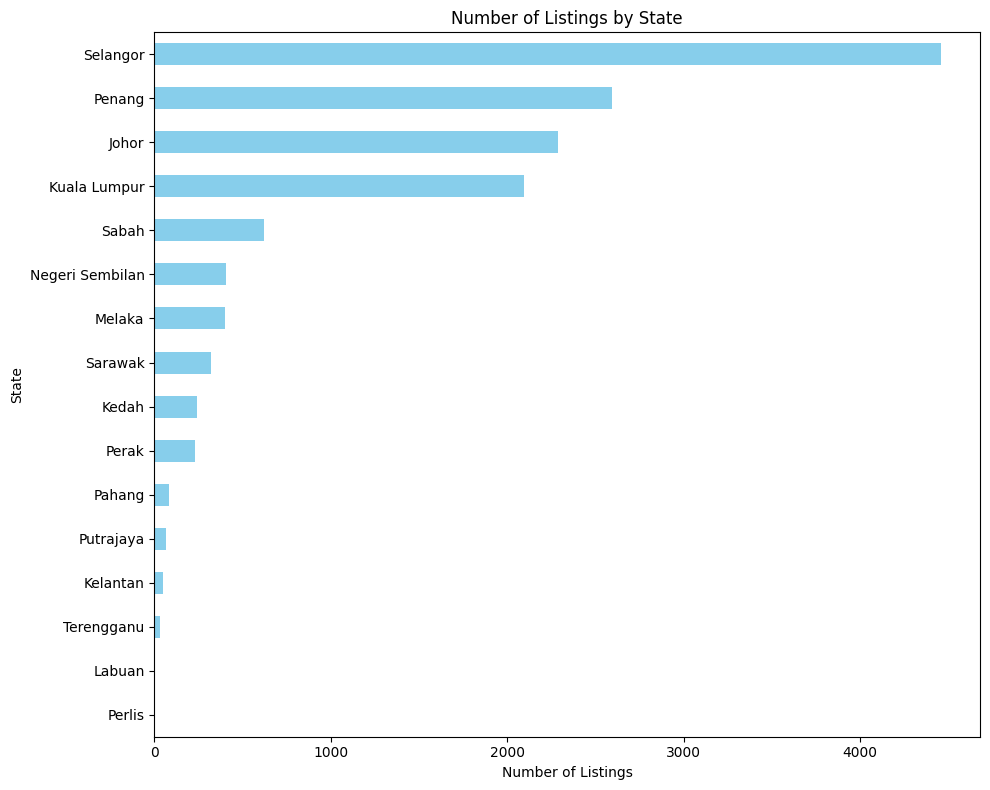

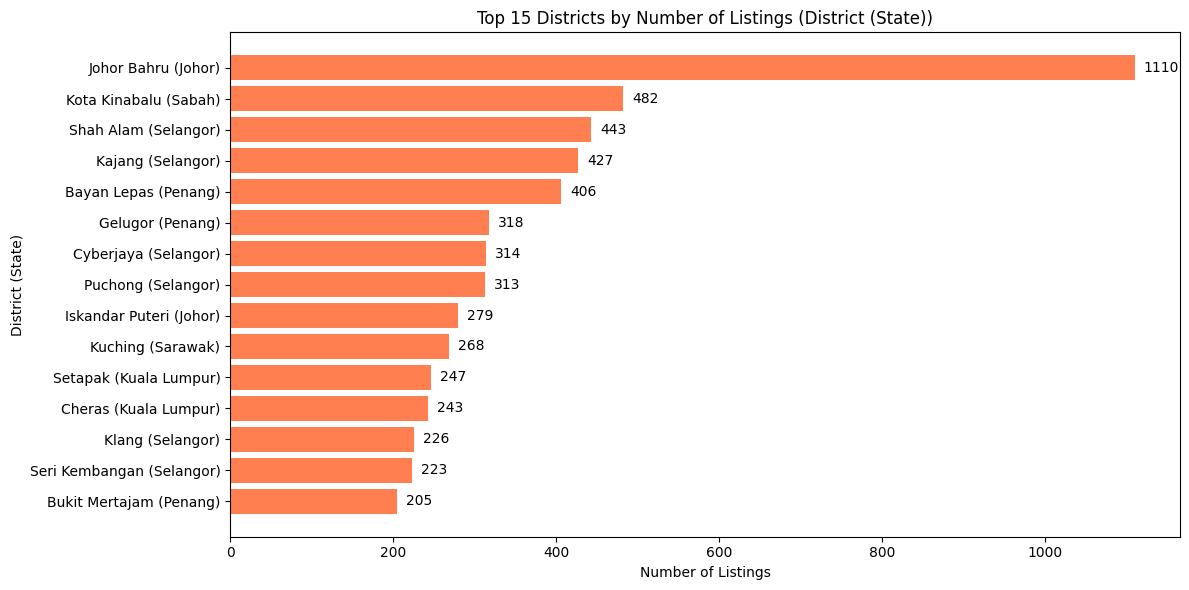

In [21]:
#Horizontal bar charts: State and District (including State)
#State-wise horizontal bar chart
state_counts = df['State'].value_counts().sort_values()
plt.figure(figsize=(10, 8))
state_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Listings by State')
plt.xlabel('Number of Listings')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#District-wise horizontal bar chart including state in labels
district_group = df.groupby(['State', 'District']).size().reset_index(name='count')
district_group['label'] = district_group['District'].astype(str) + ' (' + district_group['State'].astype(str) + ')'
#Srt by count descending and pick top N (adjustable)
top_n = 15
top_districts = district_group.sort_values('count', ascending=False).head(top_n)
#Reverse for horizontal plotting (largest at top)
top_districts = top_districts.iloc[::-1]

plt.figure(figsize=(12, max(6, 0.35 * len(top_districts))))
plt.barh(top_districts['label'], top_districts['count'], color='coral')
plt.title(f'Top {len(top_districts)} Districts by Number of Listings (District (State))')
plt.xlabel('Number of Listings')
plt.ylabel('District (State)')

#Annotate counts on bars
for i, (count) in enumerate(top_districts['count']):
    plt.text(count + max(1, top_districts['count'].max()*0.01), i, str(count), va='center')

plt.tight_layout()
plt.show()

### Data Preprocessing

In [22]:
type_mapping = {
    '1-storey Terraced House': 'Terraced House',
    '1.5-storey Terraced House': 'Terraced House',
    '2-storey Terraced House': 'Terraced House',
    '2.5-storey Terraced House': 'Terraced House',
    '3-storey Terraced House': 'Terraced House',
    '3.5-storey Terraced House': 'Terraced House',
    'Condominium': 'Condominium',
    'Apartment': 'Apartment',
    'Studio': 'Studio',
    'Service Residence': 'Serviced Apartment',
    'Cluster House': 'Cluster House',
    'Semi-Detached House': 'Semi-Detached',
    'Bungalow House': 'Bungalow',
    'Link Bungalow': 'Bungalow',
    'Townhouse': 'Townhouse',
    'Townhouse Condo': 'Townhouse',
    'Flat': 'Flat',
    'Zero-Lot Bungalow': 'Bungalow',
}

df['Type_grouped'] = df['Type'].map(type_mapping).fillna(df['Type'])

In [23]:
#Print distribution for house types
print("\nHouse Type Distribution:")
print(df['Type_grouped'].value_counts())


House Type Distribution:
Type_grouped
Condominium           3872
Serviced Apartment    3095
Terraced House        2919
Apartment             2501
Semi-Detached          438
Flat                   347
Townhouse              212
Bungalow               197
Others                 171
Studio                  75
Cluster House           59
Duplex                  10
Name: count, dtype: int64


Normalize the scores using min-max algorithm

In [ ]:
# Convert Price from string to numeric (remove commas if present)
df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(',', ''), errors='coerce')

# Convert Size from string to numeric (remove commas and units like 'sqft' if present)
df['Size'] = pd.to_numeric(df['Size'].astype(str).str.replace(',', '').str.replace(' sqft', '').str.replace('sqft', ''), errors='coerce')

# Convert Number of beds and Number of bathrooms to numeric
df['Number of beds'] = pd.to_numeric(df['Number of beds'], errors='coerce')
df['Number of bathrooms'] = pd.to_numeric(df['Number of bathrooms'], errors='coerce')

# Check for any remaining NaN values
print("Missing values after conversion:")
print(df[['Price', 'Size', 'Number of beds', 'Number of bathrooms']].isnull().sum())

score_features = [
    'Price',
    'Size',
    'Number of beds',
    'Number of bathrooms'
]

# Drop rows with any missing values in score features
df = df.dropna(subset=score_features).reset_index(drop=True)

Missing values after conversion:
Price                  0
Size                   0
Number of beds         4
Number of bathrooms    3
dtype: int64


In [23]:
df.to_csv('house_data_cleaned.csv', index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm = df.copy()
df_norm[score_features] = scaler.fit_transform(df[score_features])
df_norm[score_features].head()

In [25]:
df_norm['Price_inv'] = 1 - df_norm['Price']

### Modelling

Create a house score based on price, size, number of beds and number of bathrooms

In [26]:
df_norm['house_score'] = (
    0.35 * df_norm['Size'] +
    0.25 * df_norm['Number of beds'] +
    0.15 * df_norm['Number of bathrooms'] +
    0.25 * df_norm['Price_inv']
)

In [27]:
from sklearn.model_selection import train_test_split

X = df[[
    'Price',
    'Size',
    'Number of beds',
    'Number of bathrooms',
    'Type',
    'Furnished Status',
    'District',
    'State'
]]

y = df_norm['house_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42
)

Model 1: Linear Regression

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

num_features = ['Price','Size','Number of beds','Number of bathrooms']
cat_features = ['Type','Furnished Status','District','State']

preprocessor = ColumnTransformer([
    ('num', 'passthrough', num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

lr_model = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])

lr_model.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Model 2: Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Model 3: CatBoost Regressor

In [30]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
from catboost import CatBoostRegressor

cat_features_idx = [
    X.columns.get_loc(col)
    for col in ['Type','Furnished Status','District','State']
]

cb_model = CatBoostRegressor(
    iterations=500,
    depth=8,
    learning_rate=0.05,
    loss_function='RMSE',
    verbose=0,
    random_seed=42
)

cb_model.fit(
    X_train,
    y_train,
    cat_features=cat_features_idx
)

### Evaluation

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²  :", r2_score(y_test, y_pred))

In [33]:
evaluate(lr_model, X_test, y_test, "Linear Regression")
evaluate(rf_model, X_test, y_test, "Random Forest")
evaluate(cb_model, X_test, y_test, "CatBoost")


Linear Regression
MAE : 0.000369941932760759
RMSE: 0.00045863597650043573
R²  : 0.9998842493117794

Random Forest
MAE : 0.00022809748502064438
RMSE: 0.005150824583474282
R²  : 0.9854004031369025

CatBoost
MAE : 0.0002909154349415631
RMSE: 0.004789529966614078
R²  : 0.9873766933048254


Model used: Linear Regression

In [34]:
#Generate predictions for the full dataset using the trained Linear Regression pipeline
df_output = df_norm.copy()
df_output['lr_pred_score'] = lr_model.predict(X)
df_output['lr_residual'] = df_output['house_score'] - df_output['lr_pred_score']

#Save df_norm with the LR predictions to CSV
df_output.to_csv('house_scores.csv', index=False)
print("Saved house_scores.csv")

Saved house_scores.csv
